In [2]:
import _pickle as pickle
import time


def load_pickle(filename):
    return pickle.load(open(filename, "rb"))


def read_single_file(single_args):
    length = [[], [], [], [], []]
    try:
        data = pickle.load(open(single_args, 'rb'))
        for u in range(len(data['uid'])):
            for i in range(len(length)):
                length[i].append(len(data['feature'][i][u]))
    except OSError as e:
        print(single_args)
        print(e)
    return length


def ReadDataParallel(files, num_process=8):
    from multiprocessing import Pool

    start = time.time()
    pool = Pool(num_process)
    df_collection = pool.map(read_single_file, files)
    pool.close()
    pool.join()
    print("Finishing loading:", time.time() - start)
    # collect all data
    user_length = [[], [], [], [], []]
    
    for val in df_collection:
        for i in range(len(user_length)):
            user_length[i].extend(val[i])
    return user_length
    

In [15]:
import os


# data_dir = "/data/ceph/seqrec/UMMD/data/pickle/q36_age_train_org"
data_dir = "/data/ceph/seqrec/UMMD/data/pickle/q36_age_train_rec2"
filelist = [os.path.join(data_dir, val) for val in os.listdir(data_dir) if "train.pickle" in val ]
# filelist = [os.path.join(data_dir, val) for val in os.listdir(data_dir) ]
print(f"Number of files {len(filelist)}")

Number of files 66


In [16]:
user_length = ReadDataParallel(filelist, num_process=8)

Finishing loading: 17.93580150604248


# 计算数据集统计特征，稀疏度， 用户tag set大小分布等

In [17]:
# 稀疏度
import numpy as np


interactions = []
number_users = []
for val in user_length:
    interactions.append(np.sum(val))
    number_users.append(len(val))

# density 
density = []
for ind, val in enumerate(interactions):
    print(f"Domain: {ind}")
    print(f"Number of User: {number_users[ind]}")
    print(f"Number of Interaction: {val}")
    if ind < 2:
        density.append(float(val) / (number_users[ind] * 100000) )
    else:
        density.append(float(val) / (number_users[ind] * 50000) )
    print(f"Density: {density[-1]}")

# print(density)


Domain: 0
Number of User: 1166552
Number of Interaction: 81119001
Density: 0.0006953740681941311
Domain: 1
Number of User: 1166552
Number of Interaction: 14057113
Density: 0.00012050138356455606
Domain: 2
Number of User: 1166552
Number of Interaction: 81798555
Density: 0.0014023987786228132
Domain: 3
Number of User: 1166552
Number of Interaction: 59934148
Density: 0.001027543529992662
Domain: 4
Number of User: 1166552
Number of Interaction: 8661151
Density: 0.00014849146887579808


# Test set

In [10]:
filelist = [os.path.join(data_dir, val) for val in os.listdir(data_dir) if "test.pickle" in val ]
print(f"Number of files {len(filelist)}")
user_length = ReadDataParallel(filelist, num_process=8)
interactions = []
number_users = []
for val in user_length:
    interactions.append(np.sum(val))
    number_users.append(len(val))

# density 
density = []
for ind, val in enumerate(interactions):
    print(f"Domain: {ind}")
    print(f"Number of User: {number_users[ind]}")
    print(f"Number of Interaction: {val}")
    if ind < 2:
        density.append(float(val) / (number_users[ind] * 100000) )
    else:
        density.append(float(val) / (number_users[ind] * 50000) )
    print(f"Density: {density[-1]}")

Number of files 66
Finishing loading: 7.158634424209595
Domain: 0
Number of User: 1166552
Number of Interaction: 20862792
Density: 0.00017884150899402684
Domain: 1
Number of User: 1166552
Number of Interaction: 4099422
Density: 3.514135675049205e-05
Domain: 2
Number of User: 1166552
Number of Interaction: 21034101
Density: 0.0003606200323688957
Domain: 3
Number of User: 1166552
Number of Interaction: 14976872
Density: 0.00025677161412435964
Domain: 4
Number of User: 1166552
Number of Interaction: 2751837
Density: 4.717898559172673e-05


In [12]:
interactions_train = [81119001, 14057113, 81798555, 59934148, 8661151]
interactions_test = [20862792, 4099422, 21034101, 14976872, 2751837]

for ind in range(5):
    print(f"Domain: {ind}")
    val = interactions_train[ind] + interactions_test[ind]
    print(val)
    if ind < 2:
        density_f = float(val) / (1166552 * 100000)
    else:
        density_f = float(val) / (1166552 * 50000) 
    print(f"Density: {density_f}")

Domain: 0
101981793
Density: 0.000874215577188158
Domain: 1
18156535
Density: 0.00015564274031504811
Domain: 2
102832656
Density: 0.001763018810991709
Domain: 3
74911020
Density: 0.0012843151441170218
Domain: 4
11412988
Density: 0.0001956704544675248


In [29]:
size=28
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 28
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = size
plt.rcParams['ytick.labelsize'] = size
plt.rcParams['legend.fontsize'] = size
plt.rcParams['figure.titlesize'] = size

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


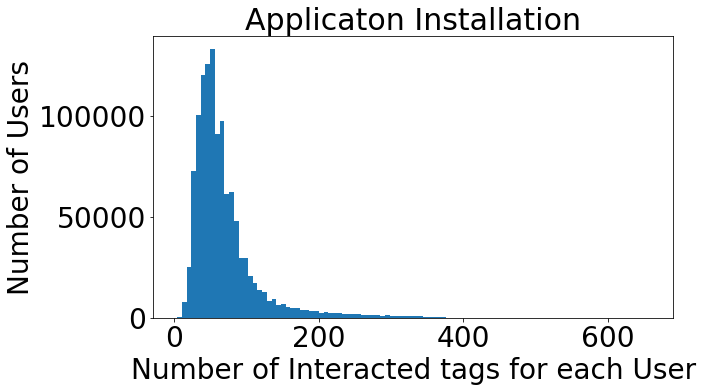

In [30]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(user_length[0], 100)
ax.set_title("Applicaton Installation")
plt.xlabel('Number of Interacted tags for each User')
plt.ylabel('Number of Users')
fig.tight_layout()
plt.savefig("app-ins.pdf", dpi=150)

plt.show()

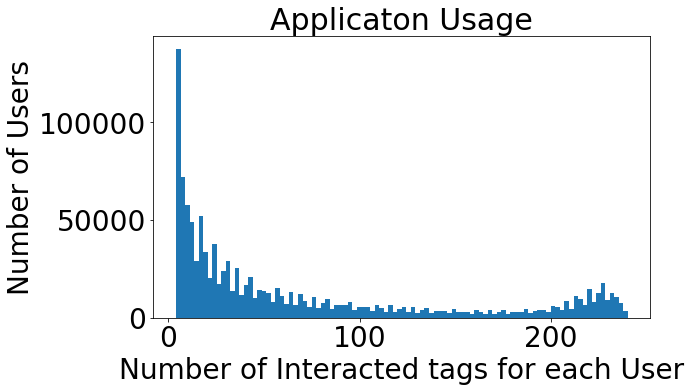

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(user_length[2], 100)

ax.set_title("Applicaton Usage")
plt.xlabel('Number of Interacted tags for each User')
plt.ylabel('Number of Users')
fig.tight_layout()
plt.savefig("app-use.pdf", dpi=150)

plt.show()

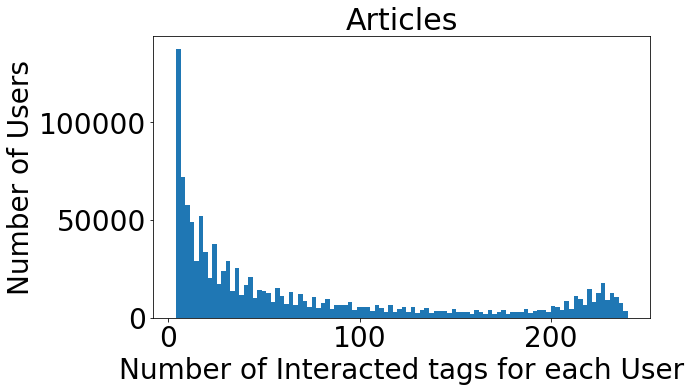

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(user_length[2], 100)

ax.set_title("Articles")
plt.xlabel('Number of Interacted tags for each User')
plt.ylabel('Number of Users')
fig.tight_layout()
plt.savefig("article.pdf", dpi=150)

plt.show()

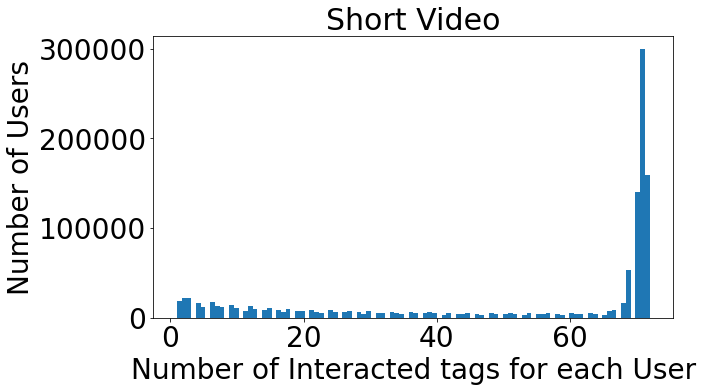

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(user_length[3], 100)

ax.set_title("Short Video")
plt.xlabel('Number of Interacted tags for each User')
plt.ylabel('Number of Users')
fig.tight_layout()
plt.savefig("video-s.pdf", dpi=150)

plt.show()

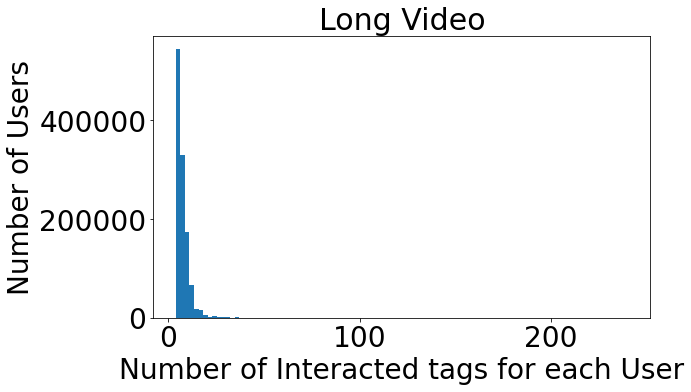

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(user_length[4], 100)

ax.set_title("Long Video")
plt.xlabel('Number of Interacted tags for each User')
plt.ylabel('Number of Users')
fig.tight_layout()
plt.savefig("video-l.pdf", dpi=150)

plt.show()

# Get basic dataset information

# 无关测试

In [1]:
import numpy as np

In [2]:
np.random.randint(0, 10, 20)

array([5, 8, 9, 6, 3, 4, 7, 6, 6, 9, 6, 1, 2, 3, 3, 6, 1, 7, 7, 4])

In [3]:
groundTrue = 100
predictTopK = 100

list(map(lambda x: x in groundTrue, predictTopK))

TypeError: 'int' object is not iterable